In [2]:
import pandas as pd
import numpy as np
import sqlite3

In [3]:
database = "database.sqlite"
conn = sqlite3.connect(database)

In [4]:
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)

In [5]:
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [158]:
player = pd.read_sql("""select * from Player""",conn)

In [159]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [168]:
height_array = player['height'].to_numpy()

In [169]:
height_array = np.where(height_array < 165,165,height_array)
height_array = np.where(height_array > 195,195,height_array)

In [170]:
player['height'] = height_array

In [182]:
player['height'].unique()

array([182.88, 170.18, 172.72, 165.1 , 190.5 , 175.26, 187.96, 177.8 ,
       185.42, 180.34, 195.  , 193.04, 167.64, 165.  ])

In [183]:
for i in range(len(player['height'])):
    if player['height'][i] < 165:
        round(player['height'][i] == 165,0)
    elif player['height'][i] > 195:
        round(player['height'][i] == 195,0)

In [184]:
player['height'].unique()

array([182.88, 170.18, 172.72, 165.1 , 190.5 , 175.26, 187.96, 177.8 ,
       185.42, 180.34, 195.  , 193.04, 167.64, 165.  ])

In [187]:
player_details = pd.read_sql('''select * from Player_Attributes''',conn)
player_details.groupby(['player_api_id'],as_index = False).sum()

,player_api_id,id,player_fifa_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,2625,1957907,2079616,842.0,856.0,702.0,662.0,648.0,791.0,532.0,758.0,700.0,699.0,918.0,828.0,936.0,886.0,930.0,696.0,927.0,934.0,822.0,1082.0,781.0,796.0,998.0,869.0,705.0,774.0,867.0,881.0,894.0,792.0,174.0,180.0,267.0,145.0,146.0
1,2752,927255,2852199,1457.0,1478.0,765.0,786.0,1582.0,1151.0,429.0,942.0,639.0,396.0,1251.0,1167.0,874.0,886.0,910.0,1278.0,936.0,1206.0,1187.0,1279.0,1727.0,411.0,1686.0,1500.0,660.0,1101.0,744.0,1493.0,1484.0,1377.0,233.0,128.0,149.0,191.0,317.0
2,2768,1854195,2310399,1455.0,1482.0,887.0,898.0,1400.0,1359.0,604.0,845.0,1087.0,421.0,1197.0,1184.0,1196.0,1237.0,1219.0,1466.0,1264.0,814.0,1615.0,1245.0,1416.0,408.0,1318.0,1569.0,928.0,1213.0,670.0,1505.0,1483.0,1674.0,226.0,334.0,477.0,318.0,254.0
3,2770,1082235,2742915,1067.0,1103.0,928.0,1015.0,1017.0,1088.0,1007.0,1126.0,1197.0,1030.0,1054.0,1151.0,933.0,897.0,939.0,989.0,919.0,1025.0,857.0,765.0,939.0,1095.0,852.0,674.0,968.0,1074.0,959.0,453.0,563.0,375.0,130.0,235.0,408.0,245.0,255.0
4,2790,25620,554045,351.0,379.0,350.0,187.0,276.0,340.0,215.0,304.0,335.0,277.0,349.0,334.0,354.0,356.0,325.0,346.0,335.0,232.0,305.0,352.0,355.0,212.0,342.0,317.0,303.0,300.0,277.0,373.0,373.0,345.0,40.0,85.0,295.0,83.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11055,744907,732677,2491588,571.0,725.0,467.0,489.0,522.0,654.0,467.0,621.0,511.0,478.0,643.0,610.0,726.0,704.0,671.0,588.0,814.0,555.0,693.0,594.0,549.0,423.0,401.0,247.0,533.0,566.0,577.0,434.0,533.0,544.0,93.0,148.0,137.0,126.0,93.0
11056,746419,116611,467860,118.0,132.0,110.0,56.0,100.0,70.0,58.0,134.0,74.0,78.0,70.0,110.0,154.0,152.0,140.0,120.0,148.0,58.0,110.0,126.0,92.0,54.0,118.0,106.0,110.0,80.0,86.0,110.0,138.0,124.0,14.0,20.0,14.0,18.0,18.0
11057,748432,120361,467938,116.0,136.0,96.0,52.0,114.0,98.0,48.0,82.0,78.0,40.0,82.0,84.0,128.0,136.0,100.0,96.0,104.0,92.0,136.0,100.0,134.0,50.0,104.0,110.0,76.0,72.0,90.0,126.0,138.0,136.0,16.0,16.0,24.0,24.0,12.0
11058,750435,1326717,2029158,508.0,634.0,315.0,513.0,495.0,540.0,468.0,527.0,504.0,333.0,486.0,507.0,591.0,572.0,542.0,549.0,702.0,513.0,522.0,513.0,414.0,450.0,306.0,117.0,507.0,522.0,549.0,162.0,171.0,189.0,81.0,90.0,72.0,90.0,99.0


In [8]:
country = pd.read_sql('select * from Country',conn)
country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [9]:
league = pd.read_sql('select * from League as L join Country as C on L.country_id = C.id',conn)
league

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


In [10]:
Teams = pd.read_sql('''select * from Team order by team_long_name limit 10''',conn)
Teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


In [11]:
match = pd.read_sql('select * from Match',conn)
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [12]:
pd.set_option('display.max_columns',None)
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [40]:
league_report = pd.read_sql("""select country.name as Country_name, 
                                league.name as League_name,
                                season,
                                count(distinct stage) as No_of_Stages,
                                count(distinct HT.team_long_name) as No_of_Teams,
                                avg(home_team_goal) as Avg_Home_Score,
                                avg(away_team_goal) as Avg_Away_score,
                                avg(home_team_goal-away_team_goal) as Avg_Goal_diff,
                                avg(away_team_goal+home_team_goal) as Avg_Goals,
                                sum(away_team_goal+home_team_goal) as Total_Goals
                                from match 
                                join country on country.id = match.country_id
                                join league on league.id = match.league_id
                                left join Team as AT on match.home_team_api_id = AT.team_api_id 
                                left join Team as HT on match.away_team_api_id = HT.team_api_id
                                where Country_name in ('Spain','Germany','France','Italy','England')
                                group by Country_name, League_name, Season
                                having count(distinct stage) > 10;""",conn)

In [116]:
league_report.head()

,Country_name,League_name,season,No_of_Stages,No_of_Teams,Avg_Home_Score,Avg_Away_score,Avg_Goal_diff,Avg_Goals,Total_Goals
0,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
1,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
2,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
3,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
4,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
import seaborn as sns

In [92]:
df_pl = df_plot1.groupby('season').sum()

In [99]:
df_plot = pd.pivot_table(data=league_report, values='Avg_Goals', index='season', columns='Country_name')

In [100]:
df_plot

Country_name,England,France,Germany,Italy,Spain
season,,,,,
2008/2009,2.478947,2.257895,2.921569,2.600000,2.897368
2009/2010,2.771053,2.410526,2.830065,2.610526,2.713158
2010/2011,2.797368,2.342105,2.921569,2.513158,2.742105
2011/2012,2.805263,2.515789,2.859477,2.583799,2.763158
2012/2013,2.797368,2.544737,2.934641,2.639474,2.871053
2013/2014,2.768421,2.455263,3.160131,2.723684,2.750000
2014/2015,2.565789,2.492105,2.754902,2.686016,2.655263
2015/2016,2.700000,2.526316,2.830065,2.576316,2.744737


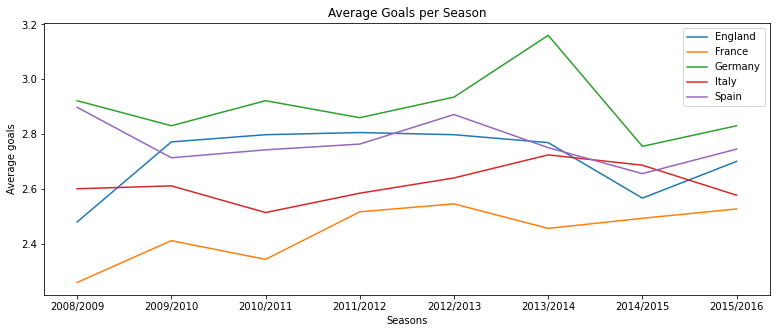

In [114]:
plt.figure(figsize = (13,5))
plt.plot(df_plot)
plt.title('Average Goals per Season')
plt.xlabel('Seasons')
plt.ylabel('Average goals')
plt.legend(['England','France','Germany','Italy','Spain'])

In [111]:
df_plot2 = pd.pivot_table(data=league_report, values = 'Avg_Goal_diff', index = 'season', columns = 'Country_name')
df_plot2

Country_name,England,France,Germany,Italy,Spain
season,,,,,
2008/2009,0.321053,0.315789,0.477124,0.442105,0.423684
2009/2010,0.623684,0.368421,0.196078,0.473684,0.486842
2010/2011,0.450000,0.342105,0.372549,0.350000,0.531579
2011/2012,0.373684,0.431579,0.460784,0.438547,0.594737
2012/2013,0.318421,0.392105,0.248366,0.350000,0.502632
2013/2014,0.378947,0.376316,0.336601,0.350000,0.513158
2014/2015,0.381579,0.328947,0.421569,0.311346,0.418421
2015/2016,0.284211,0.347368,0.300654,0.365789,0.492105


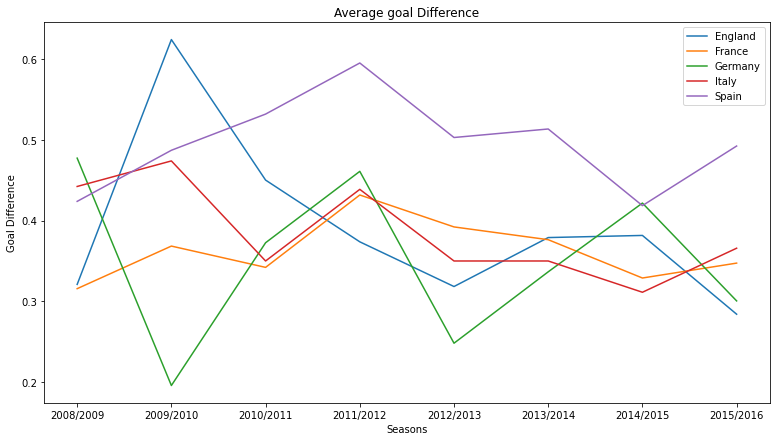

In [115]:
plt.figure(figsize=(13,7))
plt.plot(df_plot2)
plt.title('Average goal Difference')
plt.xlabel('Seasons')
plt.ylabel('Goal Difference')
plt.legend(['England','France','Germany','Italy','Spain'])
plt.show()

In [137]:
players_height = pd.read_sql("""SELECT CASE
                                        WHEN ROUND(height)<165 then 165
                                        WHEN ROUND(height)>195 then 195
                                        ELSE ROUND(height)
                                        END AS calc_height, 
                                        COUNT(height) AS distribution, 
                                        (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                        (avg(PA_Grouped.avg_potential)) AS avg_potential,
                                        AVG(weight) AS avg_weight 
                            FROM PLAYER
                            LEFT JOIN (SELECT Player_Attributes.player_api_id, 
                                        avg(Player_Attributes.overall_rating) AS avg_overall_rating,
                                        avg(Player_Attributes.potential) AS avg_potential  
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.player_api_id) 
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                            GROUP BY calc_height
                            ORDER BY calc_height
                                ;""", conn)
players_height

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161


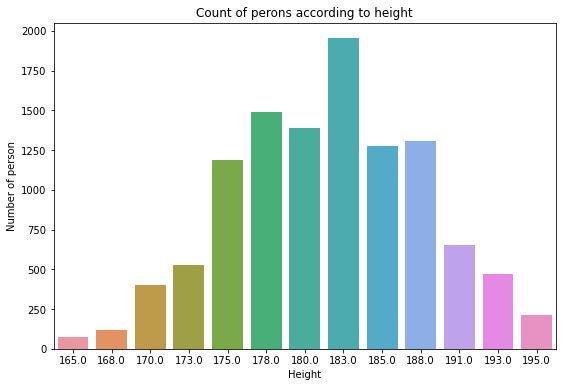

In [209]:
plt.figure(figsize=(9,6))
sns.barplot(x='calc_height', y='distribution', data=players_height)
plt.xlabel('Height')
plt.ylabel('Number of person')
plt.title('Count of perons according to height')
plt.show()